In [12]:
import cv2
import matplotlib.pyplot as plt

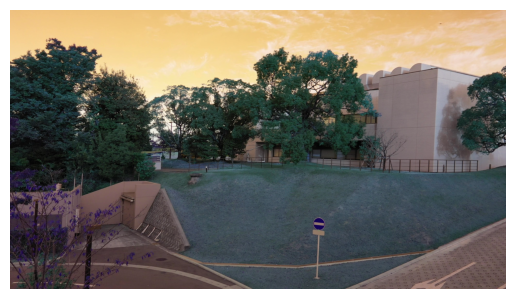

In [13]:
img = cv2.imread("../data/mva2023_sod4bird_train/images/00001.jpg", cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
import torch

In [15]:
data = torch.tensor(img).unsqueeze(0).float()
data.shape

torch.Size([1, 2160, 3840, 3])

In [16]:
data = data.permute(0, 3, 1, 2)
data.shape

torch.Size([1, 3, 2160, 3840])

In [17]:
import swin_transformer as st
from importlib import reload
reload(st)
from swin_transformer import SwinTransformer

[Warning] Fused window process have not been installed. Please refer to get_started.md for installation.


In [18]:
model = SwinTransformer(
    img_size=2016,
    patch_size=4,
    in_chans=3,
    num_classes=1,
    embed_dim=96,
    depths=[2, 2, 6, 2],
    num_heads=[3, 6, 12, 24],
    window_size=7,
    mlp_ratio=4.0,
    qkv_bias=True,
    qk_scale=None,
    drop_rate=0.0,
    attn_drop_rate=0.0,
    drop_path_rate=0.0,
    norm_layer=torch.nn.LayerNorm,
    ape=False,
    patch_norm=True,
    use_checkpoint=False,
    fused_window_process=False,
)
model

SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (layers): ModuleList(
    (0): BasicLayer(
      dim=96, input_resolution=(504, 504), depth=2
      (blocks): ModuleList(
        (0): SwinTransformerBlock(
          dim=96, input_resolution=(504, 504), num_heads=3, window_size=7, shift_size=0, mlp_ratio=4.0
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            dim=96, window_size=(7, 7), num_heads=3
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path): Identity()
          (norm2): Lay

In [19]:
data.shape

torch.Size([1, 3, 2160, 3840])

In [20]:
img = cv2.resize(img, (2016, 2016))
data = torch.tensor(img).unsqueeze(0).float()
data = data.permute(0, 3, 1, 2)
data.shape

torch.Size([1, 3, 2016, 2016])

In [21]:
model(data).shape

torch.Size([1, 3969, 768])

In [24]:
import swin_T as swin
reload(swin)
from swin_T import swin_t

In [25]:
model = swin_t()
model

Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block Residual
attention block PreNorm
atten_block Residual
Swin_Block
WindowAttention
attention block PreNorm
atten_block R

SwinTransformer(
  (stage1): StageModule(
    (patch_partition): PatchMerging_Conv(
      (patch_merge): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    )
    (layers): ModuleList(
      (0): ModuleList(
        (0): Swin_Block(
          (attention_block): Residual(
            (fn): PreNorm(
              (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (fn): WindowAttention(
                (to_qkv): Linear(in_features=96, out_features=288, bias=False)
                (to_out): Linear(in_features=96, out_features=96, bias=True)
              )
            )
          )
          (mlp_block): Residual(
            (fn): PreNorm(
              (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (fn): FeedForward(
                (network): Sequential(
                  (0): Linear(in_features=96, out_features=384, bias=True)
                  (1): GELU(approximate='none')
                  (2): Linear(in_features=384, out_features=

In [27]:
pred = model(data)
pred.shape

returning from stage module
returning from stage module
returning from stage module
returning from stage module


torch.Size([1, 768, 63, 63])